In [1]:
#Dicking around with NumPy

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import Ofpp as ofpp

In [12]:
a = np.linspace(0,23,24)
a

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [13]:
a = a.reshape((2,4,3))
a

array([[[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]],

       [[12., 13., 14.],
        [15., 16., 17.],
        [18., 19., 20.],
        [21., 22., 23.]]])

In [14]:
a.shape

(2, 4, 3)

NumPy indexing works seeminghly on a Z. M, N indexing where 

In [19]:
a[:,:,2]

array([[ 2.,  5.,  8., 11.],
       [14., 17., 20., 23.]])

In [21]:
b = a + 100
b

array([[[100., 101., 102.],
        [103., 104., 105.],
        [106., 107., 108.],
        [109., 110., 111.]],

       [[112., 113., 114.],
        [115., 116., 117.],
        [118., 119., 120.],
        [121., 122., 123.]]])

In [30]:
c = np.concatenate((a,b), axis=2)
c

array([[[  0.,   1.,   2., 100., 101., 102.],
        [  3.,   4.,   5., 103., 104., 105.],
        [  6.,   7.,   8., 106., 107., 108.],
        [  9.,  10.,  11., 109., 110., 111.]],

       [[ 12.,  13.,  14., 112., 113., 114.],
        [ 15.,  16.,  17., 115., 116., 117.],
        [ 18.,  19.,  20., 118., 119., 120.],
        [ 21.,  22.,  23., 121., 122., 123.]]])

In [33]:
X, Y = np.meshgrid(np.linspace(0,2,3),np.linspace(0,3,4))
print(X)
print(Y)

[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


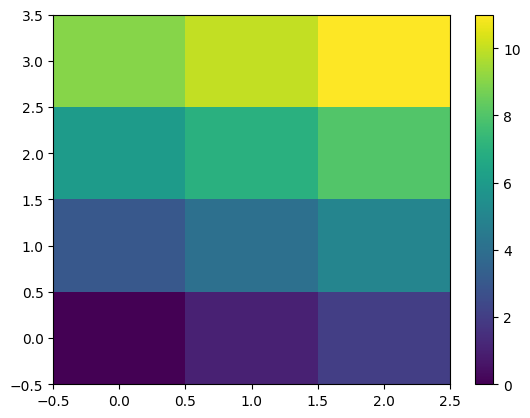

In [37]:
f,ax = plt.subplots()
plot = ax.pcolormesh(X,Y,a[0,...])
f.colorbar(plot, orientation='vertical')

In [39]:
U = ofpp.parse_internal_field("/home/hamchugh/pinns/data/0.005/U")

In [40]:
U.shape

(400, 3)

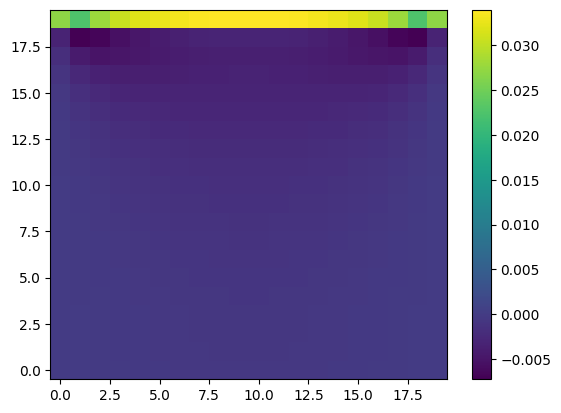

In [43]:
gridx, gridy = np.meshgrid(np.linspace(0,19,20),np.linspace(0,19,20))
U[:,0].reshape(20,20)
f,ax = plt.subplots()
plot = ax.pcolormesh(gridx,gridy,U[:,0].reshape(20,20))
f.colorbar(plot, orientation='vertical')

In [ ]:
gridx, gridy = np.meshgrid(np.linspace(0,19,20),np.linspace(0,19,20))
U_0 = np.empty_like(U[:,0].reshape(20,20))
U_0[]
f,ax = plt.subplots()
plot = ax.pcolormesh(gridx,gridy,U[:,0].reshape(20,20))
f.colorbar(plot, orientation='vertical')

In [51]:
#First row (i.e bottom of plot, all columns)
#Far bottom boundary condition
U[:,0].reshape(20,20)[0,:]

array([-4.96519e-05, -1.48964e-04, -2.46210e-04, -3.37289e-04,
       -4.19736e-04, -4.91523e-04, -5.50960e-04, -5.96694e-04,
       -6.27732e-04, -6.43422e-04, -6.43412e-04, -6.27703e-04,
       -5.96662e-04, -5.50927e-04, -4.91461e-04, -4.19662e-04,
       -3.37264e-04, -2.46222e-04, -1.48957e-04, -4.95815e-05])

In [52]:
#Far left hand side boundary
U[:,0].reshape(20,20)[:,0]

array([-4.96519e-05, -5.28083e-05, -5.54619e-05, -5.96272e-05,
       -6.54678e-05, -7.31973e-05, -8.31540e-05, -9.58599e-05,
       -1.12093e-04, -1.33019e-04, -1.60464e-04, -1.97428e-04,
       -2.49090e-04, -3.25002e-04, -4.44241e-04, -6.48179e-04,
       -1.03531e-03, -1.85747e-03, -3.32592e-03,  2.70316e-02])

In [53]:
#Last row (i.e top of plot, all columns)
#Initial condition
U[:,0].reshape(20,20)[-1,:]

array([0.0270316, 0.0224578, 0.0277452, 0.030459 , 0.0319099, 0.0327797,
       0.0333269, 0.0336726, 0.033878 , 0.0339741, 0.0339741, 0.0338779,
       0.0336724, 0.0333266, 0.0327795, 0.0319096, 0.0304588, 0.0277451,
       0.0224577, 0.0270316])

In [54]:
#Far right hand side boundary
U[:,0].reshape(20,20)[:,-1]

array([-4.95815e-05, -5.27854e-05, -5.54786e-05, -5.96782e-05,
       -6.54638e-05, -7.31403e-05, -8.31123e-05, -9.58517e-05,
       -1.12076e-04, -1.32977e-04, -1.60423e-04, -1.97387e-04,
       -2.49032e-04, -3.24976e-04, -4.44300e-04, -6.48225e-04,
       -1.03529e-03, -1.85742e-03, -3.32589e-03,  2.70316e-02])

So, we now have a good understanding of which indexes are which

Now lets try using meshgrid 3D to get our features and labels into the right format

In [81]:
y,x,t = np.meshgrid(
    np.linspace(0,3,4),
    np.linspace(0,1,2),
    np.linspace(0,2,3)
)

x.shape

(2, 4, 3)

In [82]:
features = np.concatenate((x.flatten().reshape(-1,1),y.flatten().reshape(-1,1),t.flatten().reshape(-1,1)), axis=1)
features

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 2.],
       [0., 1., 0.],
       [0., 1., 1.],
       [0., 1., 2.],
       [0., 2., 0.],
       [0., 2., 1.],
       [0., 2., 2.],
       [0., 3., 0.],
       [0., 3., 1.],
       [0., 3., 2.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 2.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 2.],
       [1., 2., 0.],
       [1., 2., 1.],
       [1., 2., 2.],
       [1., 3., 0.],
       [1., 3., 1.],
       [1., 3., 2.]])

In [84]:
labels = a.flatten().reshape(-1,1)
labels

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.]])

In [86]:
a[0,...]

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

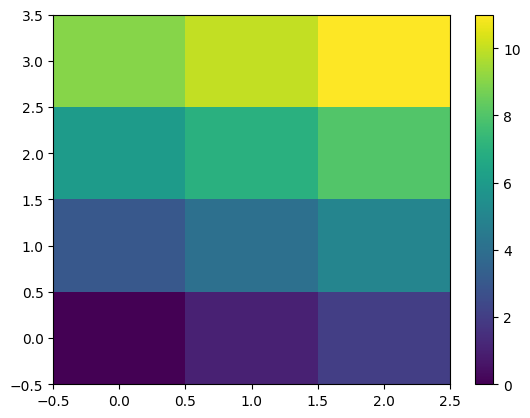

In [85]:
f,ax = plt.subplots()
plot = ax.pcolormesh(X,Y,a[0,...])
f.colorbar(plot, orientation='vertical')

In [91]:
tmp_u = a[0,:,:]
tmp_u[0,:] = -1 #bottom wall
tmp_u[1:-2,0] = -2 #left wall
tmp_u[1:-2,-1] = -3 #right wall
tmp_u

array([[-1., -1., -1.],
       [-2.,  4., -3.],
       [-2.,  7., -3.],
       [-2., 10., -3.]])

In [92]:
a[0,...]

array([[-1., -1., -1.],
       [-2.,  4., -3.],
       [-2.,  7., -3.],
       [-2., 10., -3.]])